In [0]:
# Use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive

In [0]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [0]:
#import library
import pandas as pd
import numpy as np
from glob import glob
import fnmatch
import cv2
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pylab as plt
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
itertools
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
X1=np.load('X_new.npy')
Y1=np.load('Y_new.npy')

In [0]:
X=X1[0:40000]
Y=Y1[0:40000]

In [0]:
def describe_data(x,y):
    print('Total number: {}'.format(len(x)))
    print('Number of IDC(-): {}'.format(np.sum(y==0)))
    print('Number of IDC(+): {}'.format(np.sum(y==1)))
    print('Percentage of IDC(+) : {:.2f}%'.format(100*np.mean(y)))
describe_data(X, Y)

Total number: 40000
Number of IDC(-): 30556
Number of IDC(+): 9444
Percentage of IDC(+) : 23.61%


In [0]:
x_sub = np.array(X)
x_sub=x_sub/255.0
x_sub_shape = x_sub.shape[1] * x_sub.shape[2] * x_sub.shape[3]
x_flat = x_sub.reshape(x_sub.shape[0], x_sub_shape)

In [0]:
r = pd.value_counts(Y)
print(r)
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(ratio='auto')
x_flat_resample,y_sub_resample=rus.fit_sample(x_flat,Y)
len(x_flat_resample)
r = pd.value_counts(y_sub_resample)
print(r)

0    30556
1     9444
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    9444
0    9444
dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_flat_resample, y_sub_resample, test_size=0.2, random_state = 2) # 0.2 test_size means 20%

In [0]:
Y_train_c = to_categorical(y_train, num_classes = 2)
Y_test_c = to_categorical(y_test, num_classes = 2)

In [0]:
for i in range(len(X_train)):
    height, width, channels = 50,50,3
    X_train_reshape = X_train.reshape(len(X_train),height,width,channels)
for i in range(len(X_test)):
    height, width, channels = 50,50,3
    X_test_reshape = X_test.reshape(len(X_test),height,width,channels)

df = pd.DataFrame()
df["labels"]=y_train
label = df['labels']


In [0]:
r = pd.value_counts(y_train)
print(r)

0    7569
1    7541
dtype: int64


In [0]:
print(X_train_reshape.shape)
print(Y_train_c.shape)
print(X_test_reshape.shape)
print(Y_test_c.shape)

(15110, 50, 50, 3)
(15110, 2)
(3778, 50, 50, 3)
(3778, 2)


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(50, 50, 3), padding = 'Same', strides = 2, ))
model.add(Conv2D(32,(3,3), padding = 'Same', activation='relu' ))
model.add(Conv2D(32,(3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) 

In [0]:
class MetricsCheckpoint(Callback):
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_lc(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

In [0]:
X_train_reshape_train,X_train_valid,Y_train_train,Y_train_valid = train_test_split(X_train_reshape,Y_train_c,test_size = 0.2, random_state = 0)

In [0]:
history = model.fit_generator(datagen.flow(X_train_reshape_train,Y_train_train, batch_size=32),validation_data=(X_train_valid,Y_train_valid),
                        steps_per_epoch=len(X_train_reshape_train) / 32, epochs=300 ,callbacks = [MetricsCheckpoint('logs')],verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/300





378/377 [==============================] - 20s 53ms/step - loss: 0.6514 - acc: 0.6134 - val_loss: 0.6390 - val_acc: 0.6615
Epoch 2/300
378/377 [==============================] - 12s 31ms/step - loss: 0.5605 - acc: 0.7205 - val_loss: 0.5219 - val_acc: 0.7531
Epoch 3/300
378/377 [==============================] - 12s 32ms/step - loss: 0.4911 - acc: 0.7763 - val_loss: 0.4612 - val_acc: 0.7945
Epoch 4/300
378/377 [==============================] - 12s 31ms/step - loss: 0.4627 - acc: 0.7966 - val_loss: 0.4854 - val_acc: 0.7641
Epoch 5/300
378/377 [==============================] - 12s 32ms/step - loss: 0.4433 - acc: 0.8064 - val_loss: 0.5752 - val_acc: 0.7373
Epoch 6/300
378/377 [==============================] - 12s 32ms/step - loss: 0.4289 - acc: 0.8172 - val_loss: 0.4196 - val_acc: 0.8203
Epoch 7/300
378/377 [==============================] - 12s 32ms/step - loss: 0.4240 - ac

In [0]:
score = model.evaluate(X_test_reshape,Y_test_c)
print(score)

3778/3778 [==============================] - 0s 98us/step
[0.2875535483316747, 0.8734780307040763]


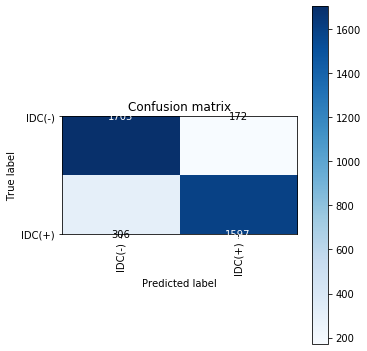

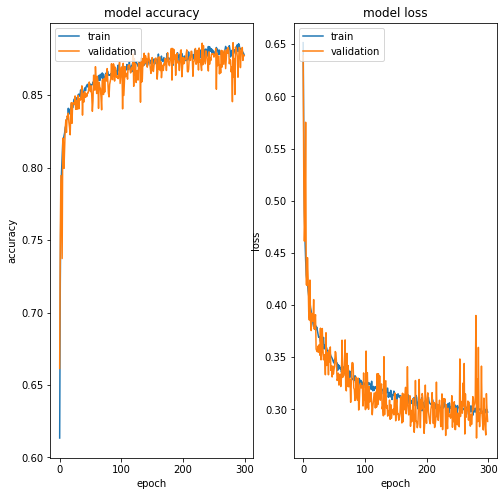

In [0]:
y_pred = model.predict(X_test_reshape)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(Y_test_c,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_cm(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()
plot_lc(history)
plt.show()


In [0]:
print(confusion_matrix(Y_true, Y_pred_classes))

from sklearn import metrics
print(metrics.classification_report(Y_true, Y_pred_classes))


[[1703  172]
 [ 306 1597]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1875
           1       0.90      0.84      0.87      1903

    accuracy                           0.87      3778
   macro avg       0.88      0.87      0.87      3778
weighted avg       0.88      0.87      0.87      3778



In [0]:
cm= confusion_matrix(Y_true, Y_pred_classes)
sensitivity= cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )
secificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ',secificity)

Sensitivity :  0.8392012611665791
Specificity :  0.9082666666666667


In [0]:
from sklearn.metrics import auc,roc_curve
#  ROC curve
fpr, tpr, thresholds = roc_curve(Y_true, y_pred[:,1], pos_label=1)

#  ROC area
pred_score = auc(fpr, tpr)
print(f'Area Under Curve is {pred_score}')

Area Under Curve is 0.952517078297425


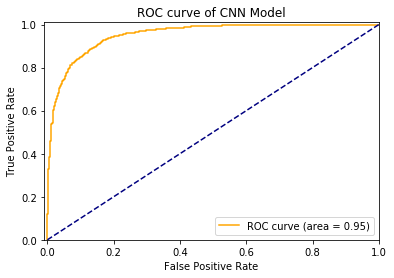

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % pred_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of CNN Model')
plt.legend(loc="lower right")

In [0]:
pred = model.predict(X_test_reshape)
pred_x = []
for i in range(len(pred)):
  if pred[i,1]>0.5:
    pred_x.append(1)
  else:
    pred_x.append(0)

a = []
b = 0
for i in range(len(pred)):
  if pred_x[i] == Y_test_c[i,1]:
    a.append('yes')
    b=b+1
  else:
    a.append('no')
type(a)
df = pd.DataFrame(a, columns=['CNN'])
print(df)
df.to_csv('cnn-yes-no_new.csv', index=False, header=True)

      CNN
0     yes
1      no
2     yes
3     yes
4     yes
...   ...
3773  yes
3774  yes
3775  yes
3776  yes
3777  yes

[3778 rows x 1 columns]


In [0]:
X_12242=np.load('./X_patient12242.npy')

X_12242.shape
X_12242=X_12242/255

In [0]:
y_pred_12242 = model.predict(X_12242)
np.save('./y_pred_12242_cnn.npy',y_pred_12242)

In [0]:
y_pred_12242=np.load('y_pred_12242_cnn.npy')

In [0]:
print(y_pred_12242[0:100])

[[1.00000000e+00 0.00000000e+00]
 [7.78539360e-01 2.21460655e-01]
 [9.03806627e-01 9.61933360e-02]
 [6.87199116e-01 3.12800854e-01]
 [7.20647037e-01 2.79353023e-01]
 [6.29961193e-01 3.70038807e-01]
 [7.88213789e-01 2.11786151e-01]
 [1.00000000e+00 7.37803698e-24]
 [7.92334497e-01 2.07665503e-01]
 [8.60186636e-01 1.39813349e-01]
 [7.89493322e-01 2.10506648e-01]
 [6.96797252e-01 3.03202808e-01]
 [5.81622064e-01 4.18377966e-01]
 [5.83631217e-01 4.16368783e-01]
 [9.50942576e-01 4.90574203e-02]
 [9.54913318e-01 4.50866297e-02]
 [6.38063192e-01 3.61936837e-01]
 [6.61182344e-01 3.38817716e-01]
 [7.47082591e-01 2.52917409e-01]
 [9.32852268e-01 6.71477467e-02]
 [8.19625556e-01 1.80374429e-01]
 [7.60026872e-01 2.39973187e-01]
 [7.11165249e-01 2.88834751e-01]
 [6.67592585e-01 3.32407445e-01]
 [9.81177688e-01 1.88223124e-02]
 [7.29196250e-01 2.70803720e-01]
 [8.39720488e-01 1.60279512e-01]
 [6.81977093e-01 3.18022937e-01]
 [6.92189336e-01 3.07810634e-01]
 [8.75864327e-01 1.24135688e-01]
 [7.061011

In [0]:
label=[]
i=0
for line in y_pred_12242:
  if line[0]>=0.5:
    label.append(0)
  else:
    label.append(1)
  i=i+1

In [0]:
y_pred_12242_new=np.c_[y_pred_12242,label]

In [0]:
example_df=pd.read_pickle("patient12242_coordinate.pkl")
example_df['target_new']=y_pred_12242_new[:,2].tolist()

In [0]:
example_df["target_new"]=example_df['target_new'].astype(int)
example_df

,x,y,target,path,target_new
0,1001,251,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
1,1001,301,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
2,1001,451,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
3,1001,401,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
4,1001,351,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
...,...,...,...,...,...
424,2501,951,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,0
425,2451,851,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,1
426,2451,951,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,1
427,2451,901,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,1


In [0]:
from pandas import api 
from pandas.api import types 
from pandas.api.types import is_numeric_dtype

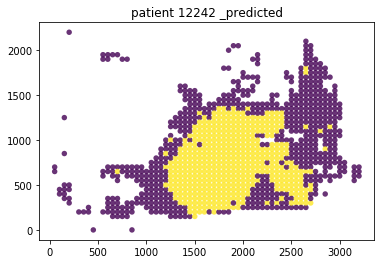

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from  matplotlib.pyplot import scatter

x=example_df['x']
y=example_df['y']
data = example_df[['x','y', 'target_new']]
colors = ("grey", "red")
groups = ("0","1")

# Create plot
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y, alpha=0.8, edgecolor='none', s=30, c=data.target_new )
#for data, color, group in zip(data, colors, groups):
# x,y=data
#  ax.scatter(x, y, alpha=0.8, c=colors, edgecolor='none', s=30, label=group)
plt.title('patient 12242 _predicted')


plt.show()

In [0]:
from sklearn.externals import joblib
joblib.dump(model, "cnn_train_model.m")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['cnn_train_model.m']

In [0]:
X_10253=np.load('./X_patient10253_CNN.npy')
XX_10253 = X_10253/255

In [0]:
y_pred_10253=model.predict(XX_10253)
np.save('./y_pred_10253_cnn.npy',y_pred_10253)

In [0]:
y_pred_10253=np.load('y_pred_10253_cnn.npy')

In [0]:
print(y_pred_10253[0:10])

[[9.9998844e-01 1.1587192e-05]
 [9.0277588e-01 9.7224072e-02]
 [9.0672129e-01 9.3278691e-02]
 [9.9568093e-01 4.3190988e-03]
 [9.9999988e-01 1.0202876e-07]
 [9.9999857e-01 1.3898135e-06]
 [9.7335309e-01 2.6646914e-02]
 [9.9586910e-01 4.1308994e-03]
 [9.9765283e-01 2.3472202e-03]
 [9.5965368e-01 4.0346343e-02]]


In [0]:
label=[]
i=0
for line in y_pred_10253:
  if line[0]>=0.5:
    label.append(0)
  else:
    label.append(1)
  i=i+1

In [0]:
y_pred_10253_new=np.c_[y_pred_10253,label]

In [0]:
example_df=pd.read_pickle("patient10253_coordinate.pkl")
example_df['target_new']=y_pred_10253_new[:,2].tolist()

In [0]:
example_df["target_new"]=example_df['target_new'].astype(int)
example_df

,x,y,target,path,target_new
0,1001,1001,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
1,1001,1151,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
2,1001,1551,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
3,1001,1201,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
4,1001,1301,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
...,...,...,...,...,...
65,851,501,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,1
66,851,751,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
67,851,551,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,1
68,851,651,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,1


In [0]:
from pandas import api 
from pandas.api import types 
from pandas.api.types import is_numeric_dtype

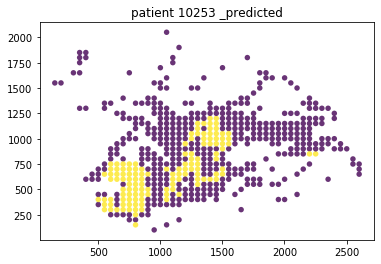

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from  matplotlib.pyplot import scatter

x=example_df['x']
y=example_df['y']
data = example_df[['x','y', 'target_new']]
colors = ("grey", "red")
groups = ("0","1")

# Create plot
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y, alpha=0.8, edgecolor='none', s=30, c=data.target_new )
#for data, color, group in zip(data, colors, groups):
# x,y=data
#  ax.scatter(x, y, alpha=0.8, c=colors, edgecolor='none', s=30, label=group)
plt.title('patient 10253 _predicted')


plt.show()